In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\nikhi\Downloads\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error

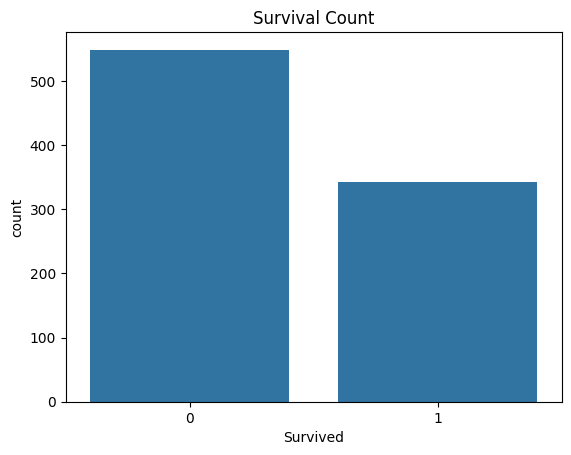

In [3]:
sns.countplot(data=df, x='Survived')
plt.title("Survival Count")
plt.show()

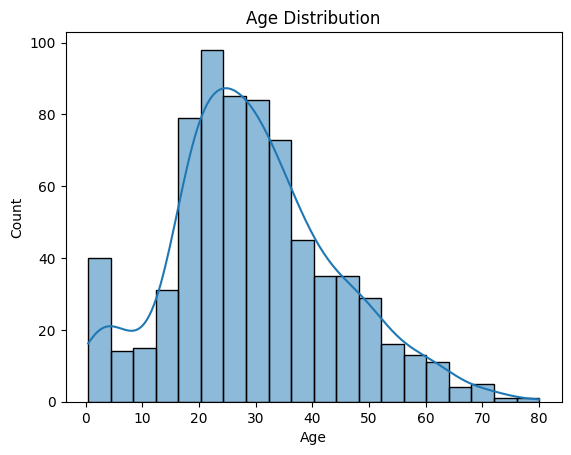

In [4]:
sns.histplot(data=df, x='Age', kde=True)
plt.title("Age Distribution")
plt.show()

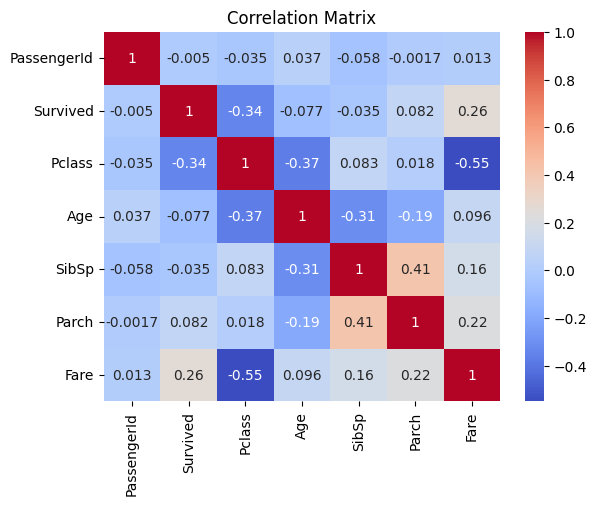

In [5]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\nikhi\AppData\Local\Temp\ipykernel_23328\65968444.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\nikhi\AppData\Local\Temp\ipykernel_23328\65968444.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [9]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
X = df.drop('Survived', axis=1)
y = df['Survived']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)  # For CV


In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X, y)
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': None}


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, mean_absolute_error

def evaluate_model(model, model_name=""):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    cv_score = cross_val_score(model, X_scaled, y, cv=5).mean()

    print(f"{model_name or model.__class__.__name__}")
    print(f"→ Test Accuracy: {acc:.4f}")
    print(f"→ Test MAE     : {mae:.4f}")
    print(f"→ CV Accuracy  : {cv_score:.4f}\n")


In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X, y)
evaluate_model(dt)

DecisionTreeClassifier
→ Test Accuracy: 0.7989
→ Test MAE     : 0.2011
→ CV Accuracy  : 0.8126



In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)
evaluate_model(rf)

RandomForestClassifier
→ Test Accuracy: 0.8101
→ Test MAE     : 0.1899
→ CV Accuracy  : 0.8103



In [20]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X, y)
evaluate_model(gb)

GradientBoostingClassifier
→ Test Accuracy: 0.8045
→ Test MAE     : 0.1955
→ CV Accuracy  : 0.8238



In [21]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X, y)
evaluate_model(xgb)


C:\Users\nikhi\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [17:44:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nikhi\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [17:44:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nikhi\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [17:44:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nikhi\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [17:44:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

XGBClassifier
→ Test Accuracy: 0.8045
→ Test MAE     : 0.1955
→ CV Accuracy  : 0.8148



C:\Users\nikhi\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [17:44:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nikhi\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [17:44:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [22]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(verbose=0)
cat.fit(X, y)
evaluate_model(cat)


CatBoostClassifier
→ Test Accuracy: 0.8212
→ Test MAE     : 0.1788
→ CV Accuracy  : 0.8260



In [23]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X, y)
evaluate_model(ada)

AdaBoostClassifier
→ Test Accuracy: 0.7989
→ Test MAE     : 0.2011
→ CV Accuracy  : 0.7924



In [24]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
lgb.fit(X, y)
evaluate_model(lgb)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightG

c:\ProgramData\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\ProgramData\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 273, number of negative: 440
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Tot

c:\ProgramData\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
evaluate_model(knn)

KNeighborsClassifier
→ Test Accuracy: 0.8045
→ Test MAE     : 0.1955
→ CV Accuracy  : 0.8115



In [26]:
models = {
    "Decision Tree": dt,
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "XGBoost": xgb,
    "CatBoost": cat,
    "AdaBoost": ada,
    "LightGBM": lgb,
    "KNN": knn
}

for name, model in models.items():
    acc = cross_val_score(model, X, y, cv=5).mean()
    print(f" =>> {name} Accuracy: {acc:.4f}")


 =>> Decision Tree Accuracy: 0.8137
 =>> Random Forest Accuracy: 0.8137
 =>> Gradient Boosting Accuracy: 0.8227


C:\Users\nikhi\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [17:45:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nikhi\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [17:45:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nikhi\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [17:45:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nikhi\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [17:45:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

 =>> XGBoost Accuracy: 0.8148
 =>> CatBoost Accuracy: 0.8260
 =>> AdaBoost Accuracy: 0.7924
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,